<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Boosting


---

## Learning Objectives
### Core
- Understand the differences between bagging and boosting
- Understand how boosting is an ensemble method
- Learn the pros and cons to using boosting models
- Know how AdaBoost works for classification and regression

### Target
- Explain the impact of Boosting on the bias-variance tradeoff

### Stretch
- Understand the math and procedure for AdaBoost, the "classic" boosting model
- Understand the differences between AdaBoost and Gradient Boosting Models


<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Boosting-as-an-Ensemble-Method" data-toc-modified-id="Boosting-as-an-Ensemble-Method-2">Boosting as an Ensemble Method</a></span></li><li><span><a href="#Pros-and-Cons-of-Boosting" data-toc-modified-id="Pros-and-Cons-of-Boosting-3">Pros and Cons of Boosting</a></span><ul class="toc-item"><li><span><a href="#Pros" data-toc-modified-id="Pros-3.1">Pros</a></span></li><li><span><a href="#Cons" data-toc-modified-id="Cons-3.2">Cons</a></span></li></ul></li><li><span><a href="#Boosting-and-the-Bias-Variance-Trade-Off" data-toc-modified-id="Boosting-and-the-Bias-Variance-Trade-Off-4">Boosting and the Bias-Variance Trade-Off</a></span><ul class="toc-item"><li><span><a href="#Why?" data-toc-modified-id="Why?-4.1">Why?</a></span></li></ul></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-5">AdaBoost</a></span><ul class="toc-item"><li><span><a href="#Training-Example-Weights" data-toc-modified-id="Training-Example-Weights-5.1">Training Example Weights</a></span></li></ul></li><li><span><a href="#AdaBoost-Visualization" data-toc-modified-id="AdaBoost-Visualization-6">AdaBoost Visualization</a></span></li><li><span><a href="#Gradient-Boosting-Models" data-toc-modified-id="Gradient-Boosting-Models-7">Gradient Boosting Models</a></span></li><li><span><a href="#Gradient-Boosting-and-Ada-Boost" data-toc-modified-id="Gradient-Boosting-and-Ada-Boost-8">Gradient Boosting and Ada Boost</a></span></li><li><span><a href="#Additional-Resources" data-toc-modified-id="Additional-Resources-9">Additional Resources</a></span></li></ul></div>

## Boosting as an Ensemble Method

---

Boosting is another ensemble method with a different approach than bagging. Boosting takes a weak base learner and tries to make it a strong learner by retraining it on the misclassified samples.

1) **Base model fitting is an iterative procedure**: It cannot be run in parallel.
- **Weights are assigned to observations to indicate their "importance:"** Samples with higher weights are given higher influence on the total error of the next model, prioritizing those observations.
- **Weights change at each iteration with the goal of correcting the errors/misclassifications of the previous iteration**: The first base estimator is fit with uniform weights on the observations.
- **Final prediction is typically constructed by a weighted vote**: Weights for each base model depend on their training errors or misclassification rates.

## Pros and Cons of Boosting

---

### Pros

- Achieves higher performance than bagging when the hyperparameters are properly tuned
- Works equally well for classification and regression
- Easily handles mixed data types
- Can use "robust" loss functions that make the model resistant to outliers

---

### Cons

- Difficult and time consuming to properly tune hyperparameters
- Cannot be parallelized like bagging (bad scalability when there are huge amounts of data)
- Higher risk of overfitting compared to bagging

<a id='viz'></a>
![boostvsbag](./images/BoostingVSBagging.png) 

## Boosting and the Bias-Variance Trade-Off

---

Recall that **bagging aims to reduce variance**.

**Boosting aims to reduce bias** (and can reduce variance a bit as well)!

### Why?

The rationale/theory behind boosting is to combine **many weak learners into a single strong learner.**

Instead of using deep/full decision trees like in bagging, **boosting uses shallow/high-bias base estimators.**

Thus, each weak learner has:

- Low variance.
- High bias.

It uses iterative fitting to explain error/misclassification unexplained by the previous base models and reduces bias without increasing variance.

## AdaBoost

---

AdaBoost is the original boosting algorithm. Predictions from AdaBoost follow this formula:


$$ {\rm AdaBoost}(X) = {\rm sign}\left(\sum_{t=1}^T\alpha_t h_t(X)\right) $$

Where:

- ${\rm AdaBoost}(X)$ are the classification predictions for $y$ using the predictor matrix $X$

- $T$ is the number of "weak learners"

- $\alpha_t$ is the contribution weight for weak learner $t$

- $h_t(X)$ is the prediction of weak learner $t$

- $y$ is binary **with values of minus one and one**

The core principle of AdaBoost is to **fit a sequence of weak learners** (i.e., models that are only slightly better than random guessing, such as a single-split tree) **on repeatedly modified versions of the data**. After each fit, the importance weights on each observation need to be updated. 

The predictions are then combined through a weighted majority vote (or sum) to produce the final prediction. AdaBoost, like all boosting ensemble methods, focuses the next model's fit on the misclassifications/weaknesses of the prior models.

All $N$ training examples start with equal importance weighting 

$$w_0=\frac{1}{N}$$ 

At each iteration step $t$ the weights $w_t$ will be adjusted for each observation.

When we finish training the classifier $h_t$ at each iteration step taking the weights $w_t$ into account we evaluate which predictions have been made correctly and where errors occurred. 

Then we update the importance weighting of the classifier itself, represented by $\alpha_t$:

$$ \alpha_t = \log \left(\frac{1-\epsilon_t}{\epsilon_t}\right) \text{where } \epsilon_t < 1$$

where $\epsilon_t$ is the weighted misclassification rate for the current classifier:

$$ \epsilon_t = \frac{\sum_{i=1}^N w_{i,t} {I}(y_i\neq h_t(X_i))}{\sum_{i=1}^N w_{i,t}} $$

Here the indicator function ${I}(y_i\neq h_t(X_i))$ returns one for incorrect predictions and zero for correct predictions.

As iterations continue, **examples that are difficult to predict receive ever-increasing influence**. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

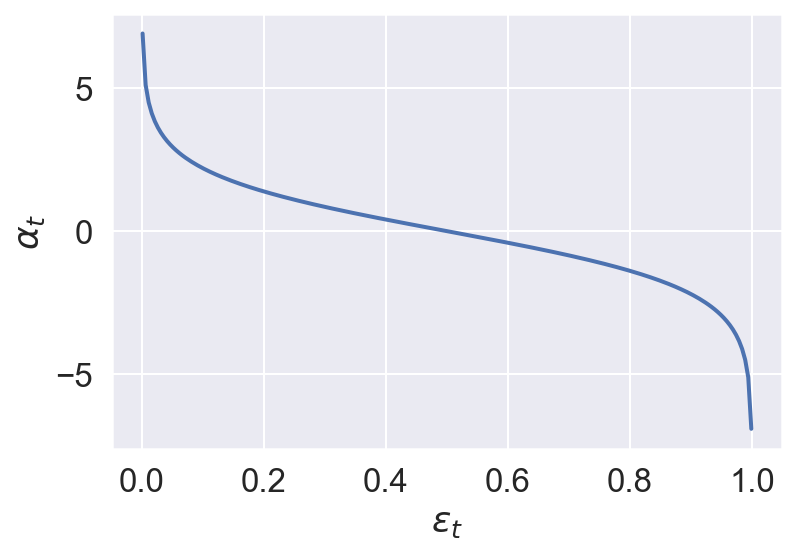

In [2]:
xvals = np.linspace(10**(-3), 1-10**(-3), 200)

def alpha(err):
    return np.log( (1-err) / err)

yvals = alpha(xvals)
plt.plot(xvals, yvals, lw=2)
plt.xlabel(r'$\epsilon_t$')
plt.ylabel(r'$\alpha_t$')
plt.show()

### Training Example Weights

AdaBoost sets up an $N$-component weight vector on the observations denoted as $w_t$ where $t$ is the current model iteration. 

The $\alpha$ weighting of the last-fit estimator is used in the equation for the weighting distribution. The update equation is:

$$ w_{t+1,i} = w_{t,i} e^{\alpha_t  {I}(y_i\neq h_t(X_i))} $$

where $X_i$ is the i-th observation and $y_i$ is the i-th target value.
The $\alpha_t$ in the exponent can be positive or negative. Misclassified observations will change their weight whereas the weight of correctly classified observations is unchanged.

$h_t$ is the previous model fit in the boosting chain.

## AdaBoost Visualization

![boostvsbag](./images/adaboost-viz.png)

## Gradient Boosting Models

---

Gradient boosting classifiers are a generalization of boosting to arbitrary, differentiable loss functions. The intuition behind this mechanism is to:

1. Fit a model $F_1$ to the data.
2. Look at the difference between our observed $y$ and our model $F_1$. (The $y_i - F_1(x_i)$ can be thought of as residuals!)
3. Fit a second model, $F_2$, to (roughly) the residuals $y_i - F_1(x_i)$.
4. Aggregate your model $F_1$ and $F_2$. While we won't get into the details now, we can interpret residuals as negative gradients. By doing this, we can apply a gradient descent algorithm to optimize our loss and generalize this to many loss functions.

GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems and is therefore used in a large variety of problems.

[This presentation](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf) shows a visual example of AdaBoost at work and how AdaBoost laid the groundwork for gradient boosting classifiers.

**The advantages of GBRT are:**

- Natural handling of mixed data types (= heterogeneous features)
- Predictive power
- Robustness to outliers in output space (via robust loss functions)

**The disadvantages of GBRT are:**
- Scalability: Due to the sequential nature of boosting, it can hardly be parallelized
- Difficult to tune hyperparameters


> _For more detailed explanations, see [here](https://www.quora.com/What-is-an-intuitive-explanation-of-Gradient-Boosting) and [here](http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/)._


## Gradient Boosting and Ada Boost

---


- AdaBoost can be considered a subcase of Gradient Boosting for a particular type of loss function (exponential loss).

## Additional Resources

---

- [Random Forest on Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Quora Question on Random Forests](https://www.quora.com/How-does-randomization-in-a-random-forest-work?redirected_qid=212859)
- [Scikit-Learn Ensemble Methods](http://scikit-learn.org/stable/modules/ensemble.html)
- [Scikit-Learn Random Forest Classifiers](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Academic Introduction to Adaptive Boosting](http://rob.schapire.net/papers/explaining-adaboost.pdf)
- [Stack Exchange AdaBoost vs. Gradient Boosting](http://stats.stackexchange.com/questions/164233/intuitive-explanations-of-differences-between-gradient-boosting-trees-gbm-ad)
- [A Gentle Introduction to Gradient Boosting](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf)
- [Quora on Intuitive Explanations of AdaBoost](https://www.quora.com/What-is-AdaBoost)
- MIT on [Adaptive Boosting](http://math.mit.edu/~rothvoss/18.304.3PM/Presentations/1-Eric-Boosting304FinalRpdf.pdf)
- A [Walk Through](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) on Tuning Gradient Boosting Models (h/t Sheena)
